# The Discrete-Time Fourier Transform

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Properties

The discrete-time Fourier transform (DTFT) has a number of specific properties that are reviewed in the following.

### Invertibility

For many types of signals it is possible to recover the discrete signal $x[k]$ from its DTFT $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$

\begin{equation}
x[k] = \mathcal{F}_*^{-1} \left\{ \mathcal{F}_* \{ x[k] \} \right\}
\end{equation}

A sufficient condition for the theorem to hold is that both the signal $x[k]$ and its DTFT are absolutely summable/integrable. For this type of signals, above relation can be proven by applying the definition of the DTFT and its inverse and rearranging terms.

**Example**

The invertibility of the DTFT is illustrated at the example of the [complex exponential signal](../discrete_signals/standard_signals.ipynb#Complex-Exponential-Signal) $x[k] = e^{j \Omega_0 k}$ [whose DTFT is given as](definition.ipynb#Transformation-of-the-Exponential-Signal) $X(j \omega) = {\bot \!\! \bot \!\! \bot} ( \frac{\Omega - \Omega_0}{2 \pi} )$. Note that the signal nor its spectrum are absolutely integrable. However, the invertibilty still holds as is shown by evaluating the [integral of the inverse DTFT](definition.ipynb#Definition). Since the integration is only performed in the range $\Omega = -\pi$ to $\pi$, it is sufficient to consider a single Dirac impulse $2 \pi \cdot \delta(\Omega - \Omega_0)$ instead of the Dirac comb for the computation.

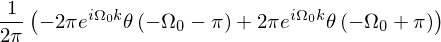

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

k = sym.symbols('k', integer=True)
W, W0 = sym.symbols('Omega Omega0', real=True)

X = 2*sym.pi*sym.DiracDelta(W - W0)
x = 1/(2*sym.pi) * sym.integrate(X * sym.exp(sym.I*W*k), (W, -sym.pi, sym.pi))
x

This result includes the restriction of the normalized angular frequency to $-\pi < \Omega_0 < \pi$ due to the usage of a single Dirac impulse instead of the Dirac comb. The result is specialized to $\Omega_0 = \frac{1}{2}$ in order to show that above result indeed constitutes a complex exponential signal.

In [2]:
x.subs(W0, sym.S.Half)

### Linearity

The DTFT is a linear operation. For two signals $x_1[k]$ and $x_2[k]$ with transforms $X_1(e^{j \Omega}) = \mathcal{F}_* \{ x_1[k] \}$ and $X_2(e^{j \Omega}) = \mathcal{F}_* \{ x_2[k] \}$ the following holds

\begin{equation}
\mathcal{F}_* \{ A \cdot x_1[k] + B \cdot x_2[k] \} = A \cdot X_1(e^{j \Omega}) + B \cdot X_2(e^{j \Omega})
\end{equation}

with $A, B \in \mathbb{C}$. The DTFT of a weighted superposition of discrete signals is equal to the weighted superposition of the individual DTFTs. This property is useful to derive the DTFT of signals that can be expressed as superposition of other signals for which the DTFT is known or can be calculated easier. Linearity holds also for the inverse DTFT.

#### Transformation of the cosine and sine signal

The DTFT of $\cos(\Omega_0 k)$ and $\sin(\Omega_0 k)$ is derived by expressing both as harmonic exponential signals using [Euler's formula](https://en.wikipedia.org/wiki/Euler's_formula)

\begin{align}
\cos(\Omega_0 k) &= \frac{1}{2} \left(  e^{-j \Omega_0 k} + e^{j \Omega_0 k} \right) \\
\sin(\Omega_0 k) &= \frac{j}{2} \left( e^{-j \Omega_0 k} - e^{j \Omega_0 k}  \right)
\end{align}

together with the DTFT $\mathcal{F}_* \{ e^{j \Omega_0 k} \} = {\bot \!\! \bot \!\! \bot} ( \frac{\Omega - \Omega_0}{2 \pi} )$ of the complex exponential signal yields

\begin{align}
\mathcal{F} \{ \cos(\Omega_0 k) \} &= \frac{1}{2} \left[ {\bot \!\! \bot \!\! \bot} \left( \frac{\Omega + \Omega_0}{2 \pi} \right) + {\bot \!\! \bot \!\! \bot} \left( \frac{\Omega - \Omega_0}{2 \pi} \right)  \right] \\
\mathcal{F} \{ \sin(\Omega_0 k) \} &= \frac{j}{2} \left[ {\bot \!\! \bot \!\! \bot} \left( \frac{\Omega + \Omega_0}{2 \pi} \right) - {\bot \!\! \bot \!\! \bot} \left( \frac{\Omega - \Omega_0}{2 \pi} \right)  \right]
\end{align}

### Symmetries

In order to investigate the symmetries of the DTFT $X(e^{j \Omega}) = \mathcal{F}_* \{ x[k] \}$ of a signal $x[k]$, first the case of a real valued signal $x[k] \in \mathbb{R}$ is considered. The results are then generalized to complex signals $x[k] \in \mathbb{C}$.

#### Real valued signals

Decomposing a real valued signal $x[k] \in \mathbb{R}$ into its even and odd part $x[k] = x_\text{e}[k] + x_\text{o}[k]$ and introducing these into the definition of the DTFT yields

\begin{align}
X(e^{j \Omega}) &= \sum_{k = -\infty}^{\infty} \left( x_\text{e}[k] + x_\text{o}[k] \right) e^{-j \Omega k} \\
&= \sum_{k = -\infty}^{\infty} \left( x_\text{e}[k] + x_\text{o}[k] \right) \cdot \left( \cos[\Omega k] - j \sin[\Omega k] \right) \\
&= \underbrace{\sum_{k = -\infty}^{\infty} x_\text{e}[k] \cos[\Omega k]}_{X_\text{e}(e^{j \Omega})} + 
j \underbrace{\sum_{k = -\infty}^{\infty} - x_\text{o}[k] \sin[\Omega k] }_{X_\text{o}(e^{j \Omega})}
\end{align}

For the last equality the fact was exploited that an infinite series with symmetric limits is zero for odd functions. In order to conclude on the symmetry of $X(e^{j \Omega})$ its behavior for a reverse of the sign of $\Omega$ has to be investigated. Due to the symmetry properties of $\cos[\Omega k]$ and $\sin[\Omega k]$, it follows that the DTFT of the

* even part $x_\text{e}[k]$ is real valued with even symmetry $X_\text{e}(e^{j \Omega}) = X_\text{e}(e^{-j \Omega})$
* odd part $x_\text{o}[k]$ is imaginary with odd symmetry $X_\text{o}(e^{j \Omega}) = - X_\text{o}(e^{-j \Omega})$

Combining this, it can be concluded that the DTFT $X(e^{j \Omega})$ of a real-valued signal $x[k] \in \mathbb{R}$ shows complex conjugate symmetry

\begin{equation}
X(e^{j \Omega}) = X^*(e^{- j \Omega})
\end{equation}

#### Complex Signals

By following the same procedure as above for an imaginary signal, the symmetries of the DTFT of the even and odd part of an imaginary signal can be derived. The results can be combined, by decomposing a complex signal $x[k] \in \mathbb{C}$ and its DTFT into its even and odd part for both the real and imaginary part. This results in the following symmetry relations

![Symmetries of the Fourier transform](symmetries.png)

The transformation symbols $\circ \!\! - \!\! \bullet$ illustrate which part of the signal $x[k]$ is related to which part of its spectrum $X(e^{j \Omega})$. For instance, the odd part of the real part $\Re \{ x_\text{o} [k] \}$ results in an imaginary spectrum with odd symmetry $\Im \{ X_\text{o} (e^{j \Omega}) \}$.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.